In [ ]:
%%writefile setup.sh
pip install sklearn --quiet
pip3 install torch torchvision --quiet
pip install --upgrade fastai --quiet
pip install -U skorch --quiet

Writing setup.sh


In [ ]:
!sh setup.sh

     |████████████████████████████████| 194kB 8.1MB/s 
     |████████████████████████████████| 40kB 5.1MB/s 
     |████████████████████████████████| 133kB 8.4MB/s 


In [ ]:
import torch
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
!nvidia-smi

There are 1 GPU(s) available.
Device name: Tesla V100-SXM2-16GB
Tue Sep 29 20:28:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    24W / 300W |     10MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                        

In [ ]:
import gc
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fastai import *
from fastai.text.all import *

from sklearn.metrics import accuracy_score, roc_curve, \
auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
meta_data = pd.read_csv('./abstract_data_final_01.csv')
meta_data.dtypes 

cord_uid           object
source_x           object
title              object
license            object
abstract           object
publish_year        int64
authors            object
journal            object
url                object
word_count          int64
abstract_clean     object
topic               int64
topic_resid       float64
dtype: object

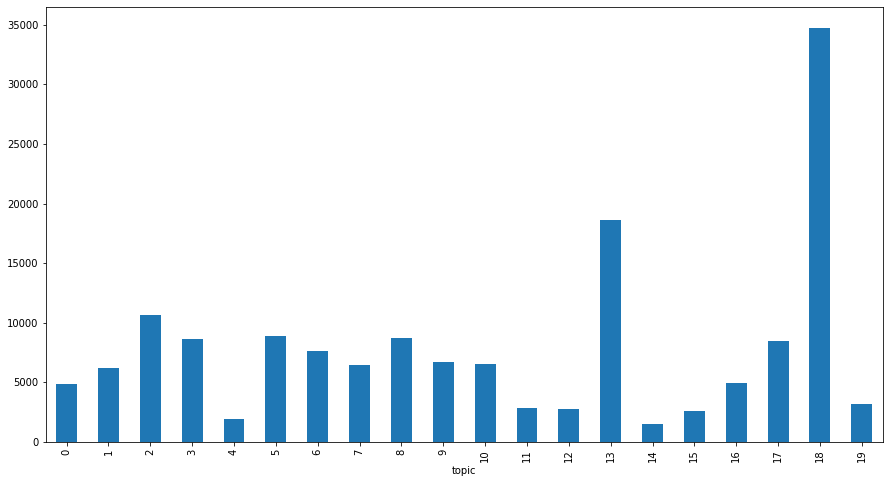

In [ ]:
meta_data.groupby("topic").count()['cord_uid'].sort_index(ascending=True,) \
.plot.bar(figsize=(15,8))

In [ ]:
df_0 = meta_data[meta_data['topic'] == 0]
df_1 = meta_data[meta_data['topic'] == 1]
df_2  = meta_data[meta_data['topic'] == 2]
df_3 = meta_data[meta_data['topic'] == 3]
df_4  = meta_data[meta_data['topic'] == 4]
df_5 = meta_data[meta_data['topic'] == 5]
df_6  = meta_data[meta_data['topic'] == 6]
df_7 = meta_data[meta_data['topic'] == 7]
df_8  = meta_data[meta_data['topic'] == 8]
df_9 = meta_data[meta_data['topic'] == 9]
df_10 = meta_data[meta_data['topic'] == 10]
df_11 = meta_data[meta_data['topic'] == 11]
df_12  = meta_data[meta_data['topic'] == 12]
df_13 = meta_data[meta_data['topic'] == 13]
df_14  = meta_data[meta_data['topic'] == 14]
df_15 = meta_data[meta_data['topic'] == 15]
df_16  = meta_data[meta_data['topic'] == 16]
df_17 = meta_data[meta_data['topic'] == 17]
df_18  = meta_data[meta_data['topic'] == 18]
df_19 = meta_data[meta_data['topic'] == 19]

In [ ]:
ratio_13 = int(len(df_13)/len(df_2))
ratio_18 = int(len(df_18)/len(df_2))

print("Topic 13 v. Topic 2 ratio: {}".format(ratio_13))
print("Topic 18 v. Topic 2 ratio: {}".format(ratio_18))

Topic 13 v. Topic 2 ratio: 1
Topic 18 v. Topic 2 ratio: 3


In [ ]:
sampled_13_df = df_13.sample(frac=1/ratio_13)
sampled_18_df = df_18.sample(frac=1/ratio_18)

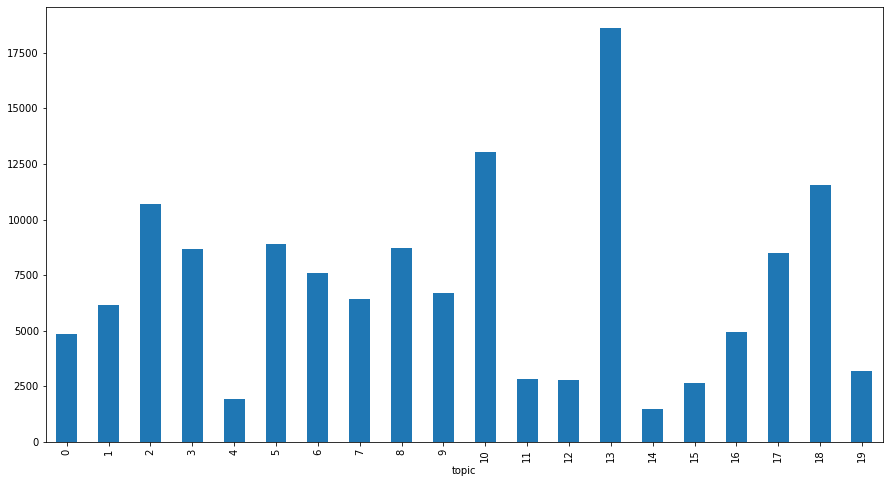

In [ ]:
meta_resampled = pd.concat([df_0,
                            df_1,
                            df_2,
                            df_3, 
                            df_4, 
                            df_5,
                            df_6,
                            df_7,
                            df_8,
                            df_9,
                            df_10, 
                            df_10,
                            df_11,
                            df_12, 
                            sampled_13_df,
                            df_14, 
                            df_15, 
                            df_16, 
                            df_17,
                            sampled_18_df,
                            df_19], axis=0)
meta_resampled.groupby("topic").count()['cord_uid'].sort_index(ascending=True,) \
.plot.bar(figsize=(15,8))

In [ ]:
meta_resampled.head()

,cord_uid,source_x,title,license,abstract,publish_year,authors,journal,url,word_count,abstract_clean,topic,topic_resid
8489,sgzg7ndp,['PMC'],"Covid-19: The Rollercoaster of Fibrin(Ogen), D-Dimer, Von Willebrand Factor, P-Selectin and Their Interactions with Endothelial Cells, Platelets and Erythrocytes",cc-by,"Severe acute respiratory syndrome coronavirus 2 (SARS-Cov-2), also known as coronavirus disease 2019 (COVID-19)-induced infection, is strongly associated with various coagulopathies that may result in either bleeding and thrombocytopenia or hypercoagulation and thrombosis. Thrombotic and bleeding or thrombotic pathologies are significant accompaniments to acute respiratory syndrome and lung complications in COVID-19. Thrombotic events and bleeding often occur in subjects with weak constitutions, multiple risk factors and comorbidities. Of particular interest are the various circulating inf...",2020,"['Grobler Corlia', ' Maphumulo Siphosethu C.', ' Grobbelaar L. Mireille', ' Bredenkamp Jhade C.', ' Laubscher Gert J.', ' Lourens Petrus J.', ' Steenkamp Janami', ' Kell Douglas B.', ' Pretorius Etheresia']",Int J Mol Sci,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7403995/,246,Severe acute respiratory syndrome coronavirus SARS-Cov- also known coronavirus disease COVID--induced infection strongly associated various coagulopathies may result either bleeding thrombocytopenia hypercoagulation thrombosis. Thrombotic bleeding thrombotic pathologies significant accompaniments ac,0,0.952161
11689,6xqqo991,['PMC'],Coronaviruserkrankung 2019 (COVID-19) und Schwangerschaft: Übersicht und Bericht des ersten deutschen Falls mit COVID-19 bei Gestationsdiabetes,no-cc,"Since the beginning of the coronavirus pandemic with SARS-CoV‑2 (severe acute respiratory syndrome coronavirus 2) in January 2020, more than 100 cases of pregnant Chinese women have been published, including individuals with gestational diabetes (GDM). The descriptive overview reports on the clinical presentation of COVID-19 as well as on obstetric and neonatal outcome data. The main symptoms of the overall milder course of infection are fever, cough and dyspnea. So far, there is no evidence of intrauterine transmission of the virus and no evidence of breast milk transfer. Postnatal infect...",2020,"['Kleinwechter H.', ' Laubner K.']",NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7149285/,124,Since beginning coronavirus pandemic SARS-CoV‑ severe acute respiratory syndrome coronavirus. January. cases pregnant Chinese women published including individuals gestational diabetes GDM. descriptive overview reports clinical presentation COVID- well obstetric neonatal outcome data. main symptoms,0,0.970757
12218,t4ns3syl,['PMC'],Pros and cons of the application of evolutionary theories to the evolution of SARS-CoV-2,cc-by,"The outbreak of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) has caused severe damage to the world. With the support of classic evolutionary theories and population genetics principles, many studies on the origin of SARS-CoV-2 have revealed encouraging results but meanwhile some are still under debate. We are concerned with the validity of applying classic evolutionary theories and formula to the evolution of RNA viruses. We have raised several confounding factors like the RNA replication feature and the RNA modification systems of the hosts, which might jeopardize the vali...",2020,"['Li Yue', ' Yang Xinai', ' Wang Na', ' Wang Haiyan', ' Yin Bin', ' Yang Xiaoping', ' Jiang Wenqing']",NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7175784/,100,outbreak severe acute respiratory syndrome coronavirus SARS-CoV- caused severe damage world. support classic evolutionary theories population genetics principles many studies origin SARS-CoV- revealed encouraging results meanwhile still debate. concerned validity applying classic evolutionary theori,0,0.937142
12348,lk67yfrp,['PMC'],In Silico Prediction of SARS Protease Inhibitors by Virtual High Throughp

In [ ]:
split = .90
df_0_train, df_0_test = train_test_split(df_0, 
                                train_size = split, 
                                random_state = 1)

df_1_train, df_1_test = train_test_split(df_1, 
                                train_size = split, 
                                random_state = 1)

df_2_train, df_2_test = train_test_split(df_2, 
                                train_size = split, 
                                random_state = 1)

df_3_train, df_3_test = train_test_split(df_3, 
                                train_size = split, 
                                random_state = 1)

df_4_train, df_4_test = train_test_split(df_4, 
                                train_size = split, 
                                random_state = 1)

df_5_train, df_5_test = train_test_split(df_5, 
                                train_size = split, 
                                random_state = 1)

df_6_train, df_6_test = train_test_split(df_6, 
                                train_size = split, 
                                random_state = 1)

df_7_train, df_7_test = train_test_split(df_7, 
                                train_size = split, 
                                random_state = 1)

df_8_train, df_8_test = train_test_split(df_8, 
                                train_size = split, 
                                random_state = 1)

df_9_train, df_9_test = train_test_split(df_9, 
                                train_size = split, 
                                random_state = 1)

df_10_train, df_10_test = train_test_split(df_10, 
                                train_size = split, 
                                random_state = 1)

df_11_train, df_11_test = train_test_split(df_11, 
                                train_size = split, 
                                random_state = 1)

df_12_train, df_12_test = train_test_split(df_12, 
                                train_size = split, 
                                random_state = 1)

df_13_train, df_13_test = train_test_split(sampled_13_df, 
                                train_size = split, 
                                random_state = 1)

df_14_train, df_14_test = train_test_split(df_14, 
                                train_size = split, 
                                random_state = 1)

df_15_train, df_15_test = train_test_split(df_15, 
                                train_size = split, 
                                random_state = 1)

df_16_train, df_16_test = train_test_split(df_16, 
                                train_size = split, 
                                random_state = 1)

df_17_train, df_17_test = train_test_split(df_17, 
                                train_size = split, 
                                random_state = 1)

df_18_train, df_18_test = train_test_split(sampled_18_df, 
                                train_size = split, 
                                random_state = 1)


df_19_train, df_19_test = train_test_split(df_19, 
                                train_size = split, 
                                random_state = 1)

In [ ]:
df_train = pd.concat([df_0_train,
                      df_1_train, 
                      df_2_train, 
                      df_3_train, 
                      df_4_train, 
                      df_5_train, 
                      df_6_train, 
                      df_7_train, 
                      df_8_train,
                      df_9_train, 
                      df_10_train,
                      df_11_train, 
                      df_12_train, 
                      df_13_train, 
                      df_14_train, 
                      df_15_train, 
                      df_16_train, 
                      df_17_train, 
                      df_18_train, 
                      df_19_train], ignore_index=True, sort=False)

df_test = pd.concat([df_0_test,
                      df_1_test, 
                      df_2_test, 
                      df_3_test, 
                      df_4_test, 
                      df_5_test, 
                      df_6_test, 
                      df_7_test, 
                      df_8_test,
                      df_9_test, 
                      df_10_test,
                      df_11_test, 
                      df_12_test, 
                      df_13_test, 
                      df_14_test, 
                      df_15_test, 
                      df_16_test, 
                      df_17_test, 
                      df_18_test, 
                      df_19_test], ignore_index=True, sort=False)

In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
df_train.sample(5)

,cord_uid,source_x,title,license,abstract,publish_year,authors,journal,url,word_count,abstract_clean,topic,topic_resid
76853,imyvmgdk,"['Medline', ' PMC']","Preventive behaviors, beliefs, and anxieties in relation to the swine flu outbreak among college students aged 18–24 years",no-cc,"AIM: The objective of this study was to assess beliefs, misconception, and anxiety in relation to swine flu outbreak and whether perception of the outbreak predicted changes in behavior. SUBJECT AND METHODS: In November 2009, we conducted an Internet-based cross-sectional survey of college students aged 18–24 years in a Midwestern State in the USA. We collected information on swine flu knowledge, perception on immunization safety, perceived efficacy of recommended behavior, changed behavior, and anxiety. RESULTS: Of the 236 respondents, 83.1% had some anxiety about swine flu, 64.8% believe...",2010,"['Kanadiya Mehulkumar K.', ' Sallar Anthony M.']",Z Gesundh Wiss,https://doi.org/10.1007/s10389-010-0373-3; https://www.ncbi.nlm.nih.gov/pubmed/32215244/,197,AIM objective study assess beliefs misconception anxiety relation swine flu outbreak whether perception outbreak predicted changes behavior. SUBJECT AND METHODS November. conducted Internet-based cross-sectional survey college students aged. years Midwestern State USA. collected information swine fl,13,0.995595
89819,w996v6od,['Medline'],[COVID-19 andcardiovascular diseases].,unk,"COVID-2019 disease mainly affects the respiratory tract and can progress in severe cases to pneumonia, acute respiratory distress syndrome and multi-organ failure. Patients with prior cardiovascular disease are at higher risk of developing an infection and progressing to a severe form of the disease. Also, due to the growing number of infected cases, it is clear that, in addition to the typical respiratory symptoms caused by the infection, some patients suffer from cardiovascular damage. This condition can, in fact, cause significant myocardial damage, which worsens the disease and affects...",2020,"['Haeck G', ' Ancion A', ' Marechal P', ' Oury C', ' Lancellotti P']",Revue medicale de Liege,https://www.ncbi.nlm.nih.gov/pubmed/32267110/,120,COVID- disease mainly affects respiratory tract progress severe cases pneumonia acute respiratory distress syndrome multi-organ failure. Patients prior cardiovascular disease higher risk developing infection progressing severe form disease. Also due growing number infected cases clear that addition,19,0.974920
38531,e8t1xn8h,['Medline'],The history of ultraviolet germicidal irradiation for air disinfection.,unk,"Public health concerns such as multi- and extensive drug-resistant tuberculosis, bioterrorism, pandemic influenza, and severe acute respiratory syndrome have intensified efforts to prevent transmission of infections that are completely or partially airborne using environmental controls. One such control, ultraviolet germicidal irradiation (UVGI), has received renewed interest after decades of underutilization and neglect. With renewed interest, however, come renewed questions, especially regarding efficacy and safety. There is a long history of investigations concluding that, if used prope...",2010,['Reed Nicholas G'],Public health reports,https://www.ncbi.nlm.nih.gov/pubmed/20402193/,153,Public health concerns multi- extensive drug-resistant tuberculosis bioterrorism pandemic influenza severe acute respiratory syndrome intensified efforts prevent transmission infections completely partially airborne using environmental controls. One control ultraviolet germicidal irradiation UVGI re,6,0.977660
91257,t319flz3,"['Medline', ' PMC']",The unique characteristics of COVID-19 coagulopathy,cc-by,"Thrombotic complications and coagulopathy frequently occur in COVID-19. However, the characteristics of COVID-19-associated coagulopathy (CAC) are distinct from those seen with bacterial sepsis-induced coagulopathy (SIC) and disseminated intravascular coagulation (DIC), with CAC usually sh

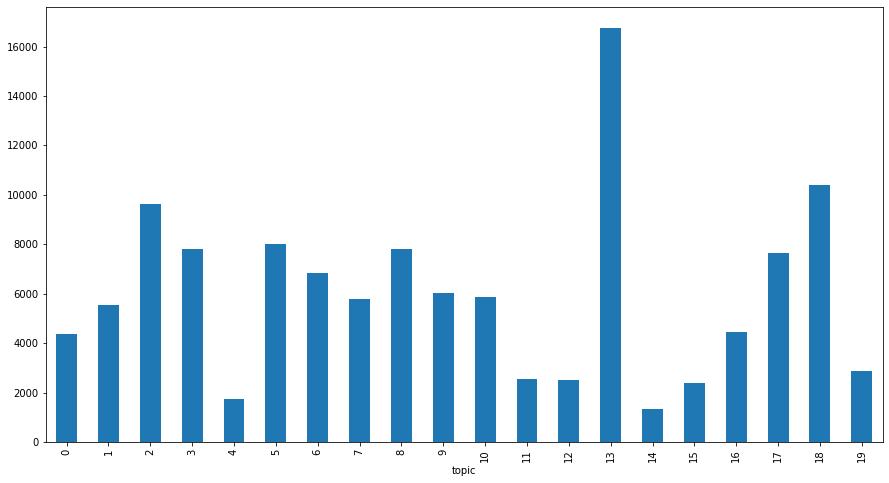

In [ ]:
df_train.groupby("topic").count()['cord_uid'].sort_index(ascending=True,) \
.plot.bar(figsize=(15,8))

In [ ]:
df_test.sample(5)

,cord_uid,source_x,title,license,abstract,publish_year,authors,journal,url,word_count,abstract_clean,topic,topic_resid
7789,yptntbea,['Medline'],A randomized clinical trial of knotless barbed suture vs conventional suture for closure of the uterine incision at cesarean delivery.,unk,"BACKGROUND Knotless barbed sutures are monofilament sutures with barbs cut into them. These sutures self-anchor, maintaining tissue approximation without the need for surgical knots. OBJECTIVE The hypothesis of this study was that knotless barbed suture could be used on the myometrium to close the hysterotomy at cesarean delivery. The objective was to compare uterine closure time, need for additional sutures, and blood loss between this and a conventional suture. STUDY DESIGN This was a prospective, unblinded, randomized controlled trial conducted at the Ziv Medical Center, Zefat, Israel. ...",2018,"['Peleg David', ' Ahmad Ronan Said', ' Warsof Steven L', ' Marcus-Braun Naama', ' Sciaky-Tamir Yael', ' Ben Shachar Inbar']",American journal of obstetrics and gynecology,https://doi.org/10.1016/j.ajog.2018.01.043; https://www.ncbi.nlm.nih.gov/pubmed/29496259/,318,BACKGROUND Knotless barbed sutures monofilament sutures barbs cut them. sutures self-anchor maintaining tissue approximation without need surgical knots. OBJECTIVE hypothesis study knotless barbed suture could used myometrium close hysterotomy cesarean delivery. objective compare uterine closure tim,3,0.998011
2758,tiw8lxzq,['Medline'],Severe colon ischemia in patients with severe coronavirus-19 (COVID-19).,unk,"COVID-19 is associated with severe coagulopathy. We present three cases of colonic ischemia that can be attributed to the hypercoagulable state related with SARS-CoV2 and disseminated intravascular coagulation. Three males aged 76, 68 and 56 with respiratory distress presented episodes of rectal bleeding, abdominal distension and signs of peritoneal irritation. Endoscopy (case 1) and computed tomography angiography revealed colonic ischemia. One patient (case 2) in which a computed tomography (CT) scan showed perforation of the gangrenous cecum underwent surgery. D-dimer levels were marked...",2020,"['Almeida Vargas Ana', ' Valentí Víctor', ' Sánchez Justicia Carlos', ' Martínez Regueira Fernando', ' Martí Cruchaga Pablo', ' Luján Colás Juan', ' Aliseda Jover Daniel', ' Esteban Gordillo Sara', ' Cienfuegos Javier A', ' Rotellar Sastre Fernando']",Revista espanola de enfermedades digestivas : organo oficial de la Sociedad Espanola de Patologia Digestiva,https://doi.org/10.17235/reed.2020.7329/2020; https://www.ncbi.nlm.nih.gov/pubmed/32954769/,100,COVID- associated severe coagulopathy. present three cases colonic ischemia attributed hypercoagulable state related SARS-CoV disseminated intravascular coagulation. Three males aged. respiratory distress presented episodes rectal bleeding abdominal distension signs peritoneal irritation. Endoscopy,19,0.992324
6031,yd3nmqmb,"['Medline', ' PMC']",SARS-CoV-2 induces transcriptional signatures in human lung epithelial cells that promote lung fibrosis,cc-by,"BACKGROUND: Severe acute respiratory syndrome (SARS)-CoV-2-induced coronavirus disease-2019 (COVID-19) is a pandemic disease that affects > 2.8 million people worldwide, with numbers increasing dramatically daily. However, there is no specific treatment for COVID-19 and much remains unknown about this disease. Angiotensin-converting enzyme (ACE)2 is a cellular receptor of SARS-CoV-2. It is cleaved by type II transmembrane serine protease (TMPRSS)2 and disintegrin and metallopeptidase domain (ADAM)17 to assist viral entry into host cells. Clinically, SARS-CoV-2 infection may result in acute...",2020,"['Xu Jincheng', ' Xu Xiaoyue', ' Jiang Lina', ' Dua Kamal', ' Hansbro Philip M.', ' Liu Gang']",Respir Res,https://doi.org/10.1186/s12931-020-01445-6; https://www.ncbi.nlm.nih.gov/pubmed/32664949/,236,BACKGROUND Severe acute respiratory syndrome SARS-CoV--induced coronavirus disease- COVID- pandem

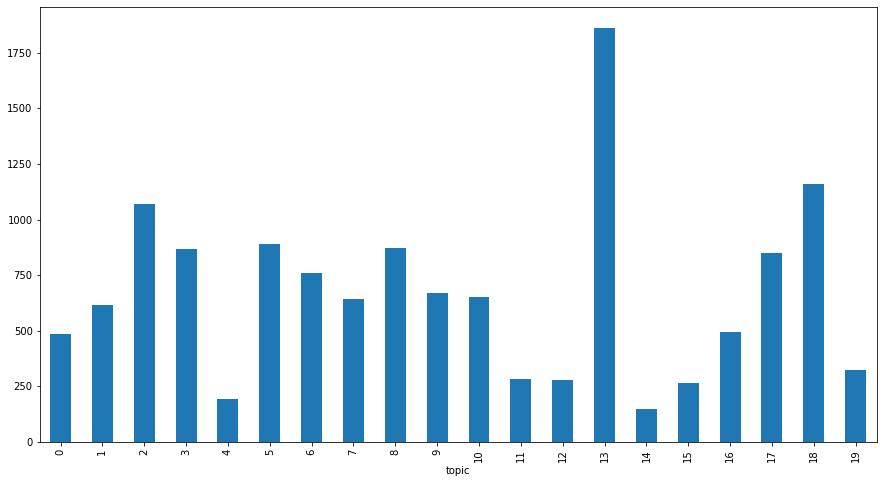

In [ ]:
df_test.groupby("topic").count()['cord_uid'].sort_index(ascending=True,) \
.plot.bar(figsize=(15,8))

In [ ]:
all_data = pd.concat([df_train, df_test], axis=0)[['abstract_clean', "topic"]]
all_data.sample(5)

,abstract_clean,topic
3759,PURPOSE REVIEW study aims review history human immunodeficiency virus HIV infection epidemic China. RECENT FINDINGS HIV infection epidemic China evolved significantly past years initially exclusively within people inject drugs PWID outbreaks due plasma collection contamination mid-s almost exclusive,9
14516,Whilst broad consensus COVID- pernicious impact child welfare services general child welfare workers specifically notion thoroughly examined literature. exploratory study examined COVID- related peritraumatic distress among child welfare workers one southeastern state United States U.S Findings sugg,8
1383,first human virus genus Cardiovirus described named Saffold virus SAFV. Cardioviruses cause severe infections myocardium central nervous system animals SAFV yet convincingly associated disease humans. study possible association SAFV infections human central nervous system designed real-time PCR SAFV,2
31316,OBJECTIVE compare severity psychological distress patients epilepsy healthy controls COVID‐ outbreak southwest China well identify potential risk factors severe psychological distress among patients epilepsy. METHODS cross‐sectional case‐control study examined consecutive sample patients older years,13
106378,Abstract frequent occurrence irregular events recent years tourism industry areas Hong Kong suffered great volatility. enhance predictive accuracy tourism demand forecasting decomposition-ensemble approach developed based complete ensemble empirical mode decomposition adaptive noise data characteris,18


In [ ]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df('abstract_clean', is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(0.10) # using only 10% of entire comments data for validation inorder to learn more
)

In [ ]:
bs=16
MAX_SEQ_LEN = 300
dls = dls_lm.dataloaders(all_data,
                         bs=bs,
                         seq_len=MAX_SEQ_LEN,
                         before_batch=partial(pad_input_chunk, 
                                             pad_first=False))

In [ ]:
dls.show_batch(max_n=5)

,text,text_
0,xxbos xxup background xxmaj rapid molecular methods created new opportunities clinical microbiology laboratory affect patient care areas initial diagnosis therapy . xxmaj rapid diagnostic tests provide collaborative opportunities antimicrobial stewardship xxmaj teams xxup ast improve patient outcomes decrease antimicrobial use . xxmaj janua xxbos xxmaj spike protein important membrane protein surface severe acute respiratory syndrome coronavirus sars - cov . associates cellular receptors mediate infection target cells . xxmaj inspired mechanism in - depth investigation genome sequences protein sars - cov receptor conducted thru mathematical transformation graph xxbos two - dimensional xxmaj xxunk model degree manipulability known aggregation procedures based majority relation evaluated using xxunk - xxunk index . xxmaj extended preferences multi - valued choices used evaluate fact manipulation . xxmaj individual manipulability agents considered manipulating agent moves ideal point pl xxbos xxup background xxmaj end - of - life care provided variety healthcare settings palliative care hospitals .,xxup background xxmaj rapid molecular methods created new opportunities clinical microbiology laboratory affect patient care areas initial diagnosis therapy . xxmaj rapid diagnostic tests provide collaborative opportunities antimicrobial stewardship xxmaj teams xxup ast improve patient outcomes decrease antimicrobial use . xxmaj janua xxbos xxmaj spike protein important membrane protein surface severe acute respiratory syndrome coronavirus sars - cov . associates cellular receptors mediate infection target cells . xxmaj inspired mechanism in - depth investigation genome sequences protein sars - cov receptor conducted thru mathematical transformation graph xxbos two - dimensional xxmaj xxunk model degree manipulability known aggregation procedures based majority relation evaluated using xxunk - xxunk index . xxmaj extended preferences multi - valued choices used evaluate fact manipulation . xxmaj individual manipulability agents considered manipulating agent moves ideal point pl xxbos xxup background xxmaj end - of - life care provided variety healthcare settings palliative care hospitals . one
1,widely used experimental work providing rodent model human ocular disease species toxicologic screening . addition rat widely kept pet friendly intelligent . xxmaj diagnosis treatment ocular disease important welfare individual animals whole colonies also ensure spontaneous disease com xxbos xxmaj dynamic changes xxup rna antibodies sars - cov- infected patients remain largely unknown influence factors antibody production fully clarified . study enrolled cases xxup covid- controls . xxmaj consecutive throat swabs specimens patients collected analyzed dynamic changes xxup rna . xxmaj moreover serial serum samples patients te xxbos xxup objective develop loop - mediated isothermal amplification xxup lamp assay detection xxmaj entamoeba histolytica histolytica causative agent xxunk . xxup methods xxup lamp primer set designed histolytica xxunk gene xxup xxunk . xxmaj genomic xxup dna histolytica xxunk strain used optimize xxup lamp mixture conditions . xxmaj amplification xxbos xxup covid- pandemic adversely affected general healthcare delivery systems cancer care throughout,used experimental work providing rodent model human ocular disease species toxicologic screening . addition rat widely kept pet friendly intelligent . xxmaj diagnosis treatment ocular disease important welfare individual animals whole colonies also ensure spontaneous disease com xxbos xxmaj dynamic changes xxup rna antibodies sars - cov- infected patients remain largely unknown influence factors antibody production fully clarified . study enrolled cases xxup covid- controls . xxmaj consecutive throat swabs specimens patients collected analyzed dynamic changes xxup rna . xxmaj moreover serial serum samples patients te xxbos xxup objective develop loop - mediated i

In [ ]:
learn = language_model_learner(
    dls, 
    AWD_LSTM,
    drop_mult=0.8,
    seq_len=MAX_SEQ_LEN,
    #moms=(.85,.75,.85),
    metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.02754228748381138)

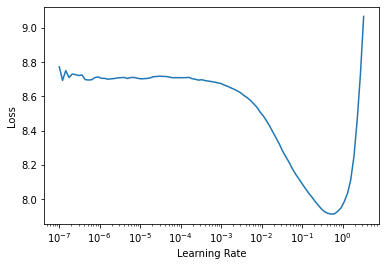

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(6, 4e-2, cbs=SaveModelCallback())

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.762334,5.315001,0.244782,203.364716,04:00


Better model found at epoch 0 with valid_loss value: 5.315001010894775.


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.878253,4.681581,0.289150,107.940598,04:14
1,4.744388,4.547056,0.296585,94.354195,04:18
2,4.560170,4.427361,0.308524,83.710213,04:18
3,4.367408,4.331484,0.316235,76.057098,04:18
4,4.178176,4.270179,0.322533,71.534424,04:18
5,4.059658,4.265752,0.323830,71.218445,04:18


Better model found at epoch 0 with valid_loss value: 4.681581020355225.
Better model found at epoch 1 with valid_loss value: 4.547055721282959.
Better model found at epoch 2 with valid_loss value: 4.427361011505127.
Better model found at epoch 3 with valid_loss value: 4.331484317779541.
Better model found at epoch 4 with valid_loss value: 4.27017879486084.
Better model found at epoch 5 with valid_loss value: 4.265751838684082.


In [ ]:
learn.save_encoder('finetuned')

In [ ]:
training_data =  pd.concat([df_train, df_valid], axis=0)[['recipe_trunc', "label"]]

In [ ]:
blocks = (TextBlock.from_df('abstract_clean', seq_len=MAX_SEQ_LEN, vocab=dls.vocab), 
          CategoryBlock())

dls = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('topic'),
                splitter=RandomSplitter(0.10))


In [ ]:
dls = dls.dataloaders(df_train, 
                      bs=16, 
                      before_batch=partial(pad_input_chunk, pad_first=False),
                      dl_type=SortedDL)

In [ ]:
learn = text_classifier_learner(dls, 
                                AWD_LSTM, 
                                pretrained=True,
                                drop_mult=0.5,
                                opt_func=partial(Adam, wd=2e-4, mom=.8), 
                                loss_func=LabelSmoothingCrossEntropy(),
                                metrics=[accuracy]).to_fp16()
                                
learn.load_encoder('finetuned')

In [ ]:
learn.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(42616, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(42616, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.010964781977236271)

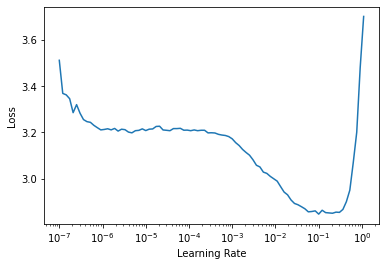

In [ ]:
learn.freeze_to(-1)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,1.630839,1.350759,0.697508,03:00


Better model found at epoch 0 with valid_loss value: 1.3507593870162964.


epoch,train_loss,valid_loss,accuracy,time
0,0.999235,0.914759,0.869684,04:17
1,0.915873,0.846652,0.896512,04:11
2,0.788366,0.787986,0.922425,04:12
3,0.734956,0.770913,0.927492,04:11


Better model found at epoch 0 with valid_loss value: 0.9147589206695557.
Better model found at epoch 1 with valid_loss value: 0.8466518521308899.
Better model found at epoch 2 with valid_loss value: 0.7879856824874878.
Better model found at epoch 3 with valid_loss value: 0.7709128856658936.


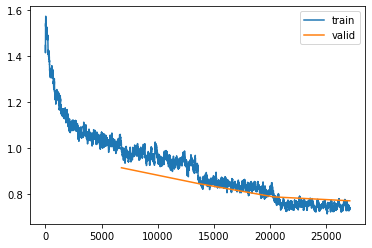

In [ ]:
learn.fine_tune(4, 2e-2, cbs=SaveModelCallback())
learn.recorder.plot_loss()

In [ ]:
learn.validate()

(#2) [0.7709128856658936,0.9274916648864746]

In [ ]:
learn.save('abs_clf_stage_1')

Path('models/abs_clf_stage_1.pth')

SuggestedLRs(lr_min=3.311311274956097e-07, lr_steep=7.585775847473997e-07)

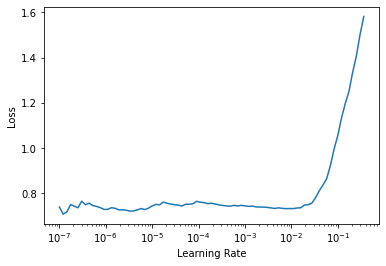

In [ ]:
learn = learn.load('abs_clf_stage_1')
learn.freeze_to(-3)
learn.lr_find()

In [ ]:
learn.fine_tune(2, 7.59e-7, cbs=SaveModelCallback())

epoch,train_loss,valid_loss,accuracy,time
0,0.732326,0.772138,0.926993,03:02


Better model found at epoch 0 with valid_loss value: 0.7721381783485413.


epoch,train_loss,valid_loss,accuracy,time
0,0.745338,0.770535,0.926827,04:20
1,0.755489,0.769971,0.926827,04:18


Better model found at epoch 0 with valid_loss value: 0.7705345749855042.
Better model found at epoch 1 with valid_loss value: 0.7699709534645081.


In [ ]:
learn.validate()

(#2) [0.7699709534645081,0.9268272519111633]

In [ ]:
learn.save('abs_clf_stage_2')

Path('models/abs_clf_stage_2.pth')

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=6.309573450380412e-07)

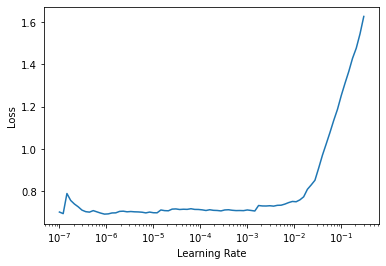

In [ ]:
learn = learn.load('abs_clf_stage_2')
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.725332,0.770825,0.926412,04:11
1,0.736420,0.770040,0.927243,04:12


Better model found at epoch 0 with valid_loss value: 0.7708245515823364.
Better model found at epoch 1 with valid_loss value: 0.7700403928756714.


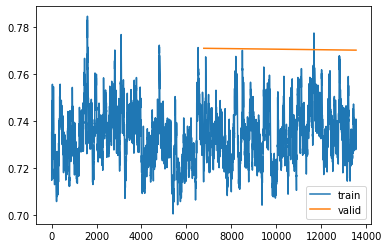

In [ ]:
learn.fit_one_cycle(2, 2e-7, cbs=SaveModelCallback())
learn.recorder.plot_loss()

In [ ]:
learn.validate()

(#2) [0.7700403928756714,0.9272425174713135]

In [ ]:
learn.save('abs_clf_stage_3')

Path('models/abs_clf_stage_3.pth')

In [ ]:
learn.load('abs_clf_stage_3')
learn = learn.to_fp32()

In [ ]:
learn.save('final_model')
learn.export()
torch.save(learn.model.state_dict(), '/content/abstract_classifier')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

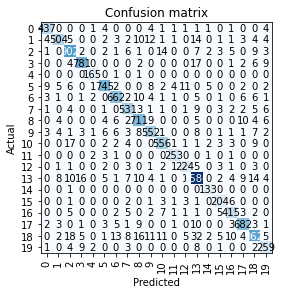

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(k=9)

,input,target,predicted,probability,loss
0,xxbos present study anti - ibv infectious bronchitis virus activities xxunk studied xxup mtt assay well docking molecular dynamic simulations . xxunk xxunk - pinene xxunk - pinene mm . maximum noncytotoxic concentrations xxunk - pinene xxunk - pinene determined .. respectively . two compounds found inhibit xxup ibv xxup ic .. mm . xxup mtt a,18,15,0.9673007130622864,5.179426670074463
1,xxbos @ # xxmaj objective analyze status xxunk practice coronavirus xxunk xxunk adults . years old xxmaj xxunk provide scientific basis corresponding health education strategies . xxmaj methods rapid development phrase xxup covid . ， subjects provinces municipalities xxmaj china invited participate quick question xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,1,6,0.8638581037521362,4.992884635925293
2,xxbos purpose study investigate trajectories psychological distress among low - income primarily xxunk xxmaj african xxmaj american women survived xxmaj hurricane xxmaj katrina xxmaj data collected year prior hurricane well approximately . years thereafter . xxmaj using xxmaj latent xxmaj class xxmaj growth xxmaj analysis xxup xxunk detected distinct trajectory groups . xxpad xxpad xxpad xxpad xxpad,18,13,0.8898081183433533,4.980203151702881
3,xxbos xxmaj objectives understand sars - co - v- infection transmission nursing homes order develop preventive strategies protecting frail elderly residents . xxmaj design outbreak investigation . xxmaj setting nursing homes affected xxup covid- outbreaks central xxmaj london . xxmaj participants residents staff nursing homes . xxmaj interventions xxmaj two p xxpad xxpad xxpad xxpad xxpad xxpad,17,5,0.8740691542625427,4.880521774291992
4,xxbos recent pandemic situation transpired due coronavirus novel strain sars - cov- become global concern . human coronavirus hcov- put world high alert numbers confirmed cases continuously increasing . world fighting deadly virus leaving stone xxunk find effective treatments testing various available drug xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,5,9,0.8930665254592896,4.832584857940674
5,xxbos xxup background diagnosis xxup covid‐ relies mainly viral nucleic acid detection false negatives lead missed diagnosis misdiagnosis . sars‐cov‐‐specific antibody detection convenient safe highly sensitive . igm igg commonly used serologically diagnose xxup covid‐ ; however role iga well known . aimed quantify levels s xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,5,12,0.8251377940177917,4.814123153686523
6,xxbos xxmaj many patients fearful acquiring xxup covid- hospitals clinics . characterized risk xxup covid- amongst patients exposed healthcare workers confirmed xxup covid- ; one patient may infected suggesting risk xxup covid- transmission healthcare workers patients generally low . xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,8,13,0.8674874305725098,4.701992988586426
7,xxbos current pandemic xxunk lives human beings every - where ways never imagined forcing question civilization headed . article explore discuss scien - xxunk . evidence helps explain recent events context xxup covid- xxunk caused infection zoonotic - origin novel virus sars - cov- genetically close two corona xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,8,5,0.9504204988479614,4.687404155731201
8,xxbos xxup background xxmaj infectious bronchitis virus xxup ibv major pathogen commercial poultry flocks circulates form several serotypesgenotypes . amino - acid changes . subunit wild - type xxup ibvs proteins may result mutants unaffected current vaccines . xxup methods xxmaj partial . gene sequences xxup ibv isolates xxmaj moroccan xxmaj italy genotype vac xxpad xxpad xxpad,10,15,0.9641178250312805,4.668636322021484


In [ ]:
print("Training Classification Report:\n")
interp.print_classification_report()

Training Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       456
           1       0.95      0.88      0.91       571
           2       0.92      0.94      0.93       958
           3       0.95      0.95      0.95       822
           4       0.95      0.99      0.97       167
           5       0.96      0.93      0.94       802
           6       0.94      0.94      0.94       706
           7       0.92      0.93      0.92       570
           8       0.91      0.93      0.92       761
           9       0.91      0.91      0.91       608
          10       0.93      0.93      0.93       601
          11       0.95      0.97      0.96       261
          12       0.90      0.91      0.91       247
          13       0.93      0.94      0.94      1682
          14       0.91      0.99      0.95       134
          15       0.88      0.92      0.90       222
          16       0.91      0.92      0.92     

In [ ]:
inf_learn = load_learner(fname='export.pkl')

In [ ]:
dl = inf_learn.dls.test_dl(df_test['abstract_clean'])

In [ ]:
start = time.time()
preds_fai, _ = inf_learn.get_preds(dl=dl)
preds_fai = [int(x) for x in (np.array(torch.argmax(preds_fai, dim=1))) ]
end = time.time()
print(f"Inference on {len(df_test)} items took {end-start} seconds.")

Inference on 13388 items took 293.77527809143066 seconds.


In [ ]:
df_test["preds"] = preds_fai

In [ ]:
df_test.head()

,cord_uid,source_x,title,license,abstract,publish_year,authors,journal,url,word_count,abstract_clean,topic,topic_resid,preds
0,qm1yutgc,['WHO'],Coronavirus Disease 2019 (COVID-19): Potential implications for weak health systems and conflict zones in the Middle East and North Africa region,unk,"This short communication recognizes the underbelly of weak and conflict-prone health systems in the Middle East and North Africa region in the wake of COVID-19 pandemic. The communication highlights how the lack of basic resources, absence of a well-functioning health system and the dearth of well-coordinated communication channels, can bode ill for the successful fight against COVID-19. The article elucidates COVID-19 potential health, social, and economic implications for such countries. The communication cautions that if COVID-19 is left to incubate and makes a home in weak systems, it ...",2020,"['Da039', ' ar Omar B', ' Haji Mohamed', ' Jradi Hoda']",Int. j. health plann. manage,NaN,141,short communication recognizes underbelly weak conflict-prone health systems Middle East North Africa region wake COVID- pandemic. communication highlights lack basic resources absence well-functioning health system dearth well-coordinated communication channels bode ill successful fight COVID-. art,6,0.990791,4
1,xtadsqke,['Medline'],Computed tomography screening for lung cancer: where are we now?,unk,"Low-dose computed tomography (LDCT) screening has been shown to result in detection of earlier-stage lung cancers, with a 20% reduction in cancer-related deaths. LDCT screening offers significant potential benefits to selected patients; however, many questions remain, including questions about the applicability of lung cancer screening in clinical practice.",2013,"['Christensen Jared D', ' Tong Betty C']",North Carolina medical journal,https://www.ncbi.nlm.nih.gov/pubmed/24165769/,48,Low-dose computed tomography LDCT screening shown result detection earlier-stage lung cancers. reduction cancer-related deaths. LDCT screening offers significant potential benefits selected patients; however many questions remain including questions applicability lung cancer screening clinical pract,13,0.997009,19
2,ukizemzc,['WHO'],Insights from an interprofessional POST-COVID-19 rehabilitation unit: A speech and language therapy and respiratory medicine perspective,unk,"OBJECTIVE: We present a case report that complements the conclusion of Stam et al. in their call to rehabilitation facilities to anticipate and prepare to address post intensive care syndrome (PICS) in post-Covid-19 patients. METHODS: The case report presented here provides insight into treating mechanically ventilated post-Covid-19 patients. RESULTS: Early intervention for dysphagia, using speech and language therapy and ventilator-compatible speaking valves, provided within an interprofessional collaborative team, can mitigate the potential negative consequences of prolonged intubation, ...",2020,"['Stierli Sarah', ' Buss Irene', ' Redecker Hermann', ' Baumberger Michael', ' Blättler Erika', ' Selb Melissa', ' Hinter Sandra', ' Ischer Barbara', ' Schwegler Hans']",J. rehabil. med,NaN,118,OBJECTIVE present case report complements conclusion Stam al. call rehabilitation facilities anticipate prepare address post intensive care syndrome PICS post-Covid- patients. METHODS case report presented provides insight treating mechanically ventilated post-Covid- patients. RESULTS Early interven,17,0.992141,17
3,lvd6kjik,"['Elsevier', ' Medline', ' PMC']",Resilience Among Professional Health Workers in Emergency Services,no-cc,"INTRODUCTION: Although it seems logical to assume that working in an emergency service implies having a great capacity to face extreme situations, resilience in health care workers has been shown to be related not only to individual personality characteristics but also with external factors. The objective of this study was to determine the resilience of professional health workers in emergen

In [ ]:
from ulmfit_utils import *

In [ ]:
print("Classification Report: ")
#evaluate_roc(list(preds_fai), df_test.topic.values.tolist())
print(classification_report(df_test["topic"], df_test["preds"]))
print(accuracy_score(df_test["topic"], df_test["preds"]))

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       485
           1       0.93      0.89      0.91       617
           2       0.93      0.94      0.94      1070
           3       0.94      0.96      0.95       866
           4       0.93      0.98      0.95       193
           5       0.95      0.93      0.94       892
           6       0.96      0.94      0.95       761
           7       0.94      0.93      0.93       643
           8       0.91      0.95      0.93       871
           9       0.92      0.92      0.92       669
          10       0.93      0.93      0.93       653
          11       0.95      0.94      0.95       285
          12       0.90      0.91      0.91       280
          13       0.94      0.95      0.94      1862
          14       0.94      0.99      0.96       149
          15       0.91      0.91      0.91       265
          16       0.94      0.95      0.94       495
   

In [ ]:
results = ['cord_uid', 'title', 'topic', 'preds']
df_test_results = df_test[results]

In [ ]:
df_test_results.to_csv('test_final.csv',index=False)